In [203]:
from sklearn.neural_network import MLPClassifier
from sklearn import svm, preprocessing
from sklearn.naive_bayes import GaussianNB, BernoulliNB

import sklearn.metrics as sklm

from sklearn import linear_model
#from statsmodels.api import datasets
from sklearn import datasets ## Get dataset from sklearn
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy.random as nr
from dateutil.relativedelta import relativedelta

import math

%matplotlib inline

<h3>Import csv file the first column is Index</h3>

In [204]:
AdvWorksCustsFinal = pd.read_csv('AWCustFinal.csv',index_col='CustomerID')

In [205]:
#AdvWorksCustsFinal.rename(index=AdvWorksCustsFinal, columns={"ageat1998": "Age"})

In [206]:
AdvWorksCustsFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 11000 to 18982
Data columns (total 14 columns):
Unnamed: 0              16404 non-null int64
CountryRegionName       16404 non-null object
Education               16404 non-null object
Occupation              16404 non-null object
Gender                  16404 non-null object
MaritalStatus           16404 non-null object
HomeOwnerFlag           16404 non-null int64
NumberCarsOwned         16404 non-null int64
NumberChildrenAtHome    16404 non-null int64
TotalChildren           16404 non-null int64
YearlyIncome            16404 non-null int64
BikeBuyer               16404 non-null int64
ageat1998               16404 non-null int64
AveMonthSpendLog        16404 non-null float64
dtypes: float64(1), int64(8), object(5)
memory usage: 1.9+ MB


In [207]:
AdvWorksCustsFinal.drop(['Unnamed: 0','AveMonthSpendLog'],axis = 1,inplace=True,)

In [208]:
AdvWorksCustsFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16404 entries, 11000 to 18982
Data columns (total 12 columns):
CountryRegionName       16404 non-null object
Education               16404 non-null object
Occupation              16404 non-null object
Gender                  16404 non-null object
MaritalStatus           16404 non-null object
HomeOwnerFlag           16404 non-null int64
NumberCarsOwned         16404 non-null int64
NumberChildrenAtHome    16404 non-null int64
TotalChildren           16404 non-null int64
YearlyIncome            16404 non-null int64
BikeBuyer               16404 non-null int64
ageat1998               16404 non-null int64
dtypes: int64(7), object(5)
memory usage: 1.6+ MB


In [209]:
AdvWorksCustsFinal['BikeBuyer'].value_counts()

0    10949
1     5455
Name: BikeBuyer, dtype: int64

In [210]:
categorical_columns = ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus','HomeOwnerFlag']
numerical_columns =  ['NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'ageat1998']

In [211]:
Labels=np.array(AdvWorksCustsFinal['BikeBuyer'])
Labels.shape

(16404,)

In [212]:
def count_unique(AdvWorksCustsFinal, cols):
    for col in cols:
        print('\n' + 'For column ' + col)
        print(AdvWorksCustsFinal[col].value_counts())
        
count_unique(AdvWorksCustsFinal, categorical_columns)


For column CountryRegionName
United States     6935
Australia         3194
United Kingdom    1709
France            1591
Germany           1577
Canada            1398
Name: CountryRegionName, dtype: int64

For column Education
Bachelors              4758
Partial College        4451
High School            2944
Graduate Degree        2851
Partial High School    1400
Name: Education, dtype: int64

For column Occupation
Professional      4922
Skilled Manual    4038
Management        2718
Clerical          2597
Manual            2129
Name: Occupation, dtype: int64

For column Gender
M    8290
F    8114
Name: Gender, dtype: int64

For column MaritalStatus
M    8852
S    7552
Name: MaritalStatus, dtype: int64

For column HomeOwnerFlag
1    11058
0     5346
Name: HomeOwnerFlag, dtype: int64


In [213]:
'''def encode_string(cat_features):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()


Features = encode_string(AdvWorksCustsFinal[categorical_columns[0]])

print(Features)

for col in categorical_columns[1:]:
    temp = encode_string(AdvWorksCustsFinal[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])'''

'def encode_string(cat_features):\n    ## First encode the strings to numeric categories\n    enc = preprocessing.LabelEncoder()\n    enc.fit(cat_features)\n    enc_cat_features = enc.transform(cat_features)\n    ## Now, apply one hot encoding\n    ohe = preprocessing.OneHotEncoder()\n    encoded = ohe.fit(enc_cat_features.reshape(-1,1))\n    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()\n\n\nFeatures = encode_string(AdvWorksCustsFinal[categorical_columns[0]])\n\nprint(Features)\n\nfor col in categorical_columns[1:]:\n    temp = encode_string(AdvWorksCustsFinal[col])\n    Features = np.concatenate([Features, temp], axis = 1)\n\nprint(Features.shape)\nprint(Features[:2, :])'

**Encode categorical data**

Now, you need to create the numpy feature array or model matrix. As first step, the categorical variables need to be recoded as binary dummy variables. As discussed in another lesson this is a three step process:

    Encode the categorical string variables as integers.
    Transform the integer coded variables to dummy variables.
    Append each dummy coded categorical variable to the model matrix.

Execute the code in the cell below to perform this processing and examine the results.

In [214]:
# Encode categorical data
def encode_string(cat_features):
    
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Education','Occupation',
                       'Gender','MaritalStatus','HomeOwnerFlag']

Features = encode_string(AdvWorksCustsFinal['CountryRegionName'])

for col in categorical_columns:
    temp = encode_string(AdvWorksCustsFinal[col])
    Features = np.concatenate([Features, temp], axis = 1)
    
print(Features.shape)
print(Features[:2, :])

(16404, 22)
[[1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]]


**Concatenate the features after the encoded categorical variables**

In [215]:
Features = np.concatenate([Features, np.array(AdvWorksCustsFinal[numerical_columns])], axis = 1)
print(Features[:1,:])
print(Features.shape)

[[1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00
  0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00
  1.00000e+00 0.00000e+00 0.00000e+00 1.00000e+00 0.00000e+00 0.00000e+00
  2.00000e+00 1.37947e+05 3.20000e+01]]
(16404, 27)


**Use train_test_split to split the data**

You must split the cases into training and test data sets. This step is critical. If machine learning models are tested on the training data, the results will be both biased and overly optimistic.

The code in the cell below performs the following processing:
1. An index vector is Bernoulli sampled using the `train_test_split` function from the `model_selection` package of scikit-learn. 
2. The first column of the resulting index array contains the indices of the samples for the training cases. 
3. The second column of the resulting index array contains the indices of the samples for the test cases. 

Execute the code. 

In [216]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.3)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

There is just one more step in preparing this data. Numeric features must be rescaled so they have a similar range of values. Rescaling prevents features from having an undue influence on model training simply because then have a larger range of numeric variables.

The code in the cell below uses the StanardScaler function from the Scikit Learn preprocessing package to Zscore scale the numeric features. Notice that the scaler is fit only on the training data. The trained scaler is these applied to the test data. Test data should always be scaled using the parameters from the training data.

Execute this code.

In [217]:
scaler = preprocessing.StandardScaler().fit(X_train[:,23:])
X_train[:,23:] = scaler.transform(X_train[:,23:])
X_test[:,23:] = scaler.transform(X_test[:,23:])
X_train[:1,]

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ,  1.        , -0.65184617, -0.00242815,
        -0.06006319,  1.74376142]])

In [218]:
X_test.shape

(4922, 27)

In [219]:
X_train.shape

(11482, 27)

**Logistic Regression**

In [220]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)
probabilities = logistic_mod.predict_proba(X_test)
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
#print(np.array(scores[:15]))
#print(y_test[:15])

In [221]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)  

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2959               345
Actual negative       712               906

Accuracy  0.79
 
           Positive      Negative
Num case     3304          1618
Precision    0.81          0.72
Recall       0.90          0.56
F1           0.85          0.63


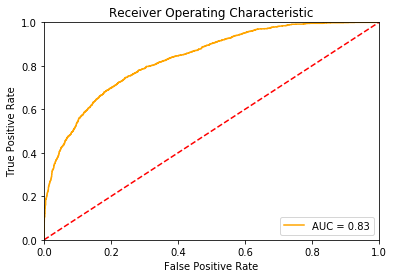

In [222]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(y_test, probabilities)  

In [223]:
logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.45, 1:0.55}) 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 0.45, 1: 0.55}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [224]:
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])

[[0.64018842 0.35981158]
 [0.49259169 0.50740831]
 [0.5517282  0.4482718 ]
 [0.72872032 0.27127968]
 [0.88708993 0.11291007]
 [0.95715971 0.04284029]
 [0.90832065 0.09167935]
 [0.91872804 0.08127196]
 [0.93276191 0.06723809]
 [0.75593003 0.24406997]
 [0.98454247 0.01545753]
 [0.38558993 0.61441007]
 [0.72769089 0.27230911]
 [0.64033764 0.35966236]
 [0.7972433  0.2027567 ]]


                 Confusion matrix
                 Score positive    Score negative
Actual positive      2865               439
Actual negative       635               983

Accuracy  0.78
 
           Positive      Negative
Num case     3304          1618
Precision    0.82          0.69
Recall       0.87          0.61
F1           0.84          0.65


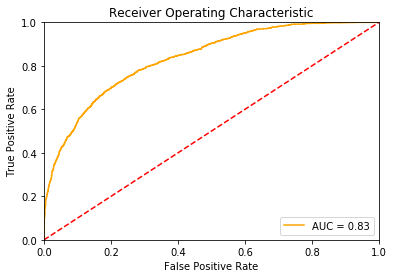

In [225]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities) 

In [226]:
'''def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.45, 0.40, 0.35, 0.3, 0.25]
for t in thresholds:
    test_threshold(probabilities, y_test, t)
'''

"def test_threshold(probs, labels, threshold):\n    scores = score_model(probs, threshold)\n    print('')\n    print('For threshold = ' + str(threshold))\n    print_metrics(labels, scores)\n\nthresholds = [0.45, 0.40, 0.35, 0.3, 0.25]\nfor t in thresholds:\n    test_threshold(probabilities, y_test, t)\n"

In [227]:
nr.seed(123)
inside = ms.KFold(n_splits=10, shuffle = True)
nr.seed(321)
outside = ms.KFold(n_splits=10, shuffle = True)

In [228]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
param_grid = {"C": [0.1, 1, 10, 100, 1000]}
## Define the logistic regression model
logistic_mod = linear_model.LogisticRegression(class_weight = {0:0.45, 1:0.55}) 

## Perform the grid search over the parameters
clf = ms.GridSearchCV(estimator = logistic_mod, param_grid = param_grid, 
                      cv = inside, # Use the inside folds
                      scoring = 'roc_auc',
                      return_train_score = True)

## Fit the cross validated grid search over the data 
clf.fit(Features, Labels)

## And print the best parameter value
clf.best_estimator_.C

0.1

In [229]:
#print(clf.cv_results_.keys())

keys- ['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score']
grid-
 [[0.80514124 0.80513957 0.80513791 0.80513791 0.80513791]
 [0.81872255 0.81870552 0.8186953  0.8186953  0.8186953 ]
 [0.80154342 0.80148071 0.80146037 0.80146037 0.80146037]
 [0.79803966 0.79801609 0.79802451 0.79802451 0.79802451]
 [0.79152621 0.79152948 0.79152784 0.79152784 0.79152784]
 [0.83752602 0.83753785 0.83754461 0.83754292 0.83754461]
 [0.8261802  0.8261269

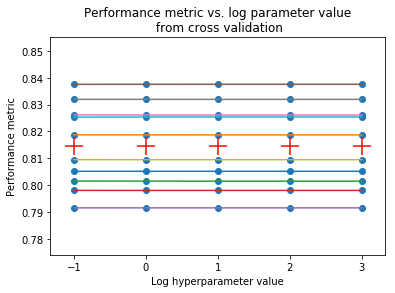

In [230]:
def plot_cv(clf, params_grid, param = 'C'):
    params = [x for x in params_grid[param]]
  
    keys = list(clf.cv_results_.keys())              
    print("keys-", keys)
    grid = np.array([clf.cv_results_[key] for key in keys[6:16]])
    print("grid-\n", grid)
    means = np.mean(grid, axis = 0)
    print("means-", means)
    stds = np.std(grid, axis = 0)
    print("stds-", stds)
    print('Performance metrics by parameter')
    print('Parameter   Mean performance   STD performance')
    for x,y,z in zip(params, means, stds):
        print('%8.2f        %6.5f            %6.5f' % (x,y,z))
    
    params = [math.log10(x) for x in params]
    
    plt.scatter(params * grid.shape[0], grid.flatten())
    p = plt.scatter(params, means, color = 'red', marker = '+', s = 300)
    plt.plot(params, np.transpose(grid))
    plt.title('Performance metric vs. log parameter value\n from cross validation')
    plt.xlabel('Log hyperparameter value')
    plt.ylabel('Performance metric')
    
plot_cv(clf, param_grid) 

In [231]:
nr.seed(498)
cv_estimate = ms.cross_val_score(clf, Features, Labels, 
                                 cv = outside) # Use the outside folds
print('Mean performance metric = %4.3f' % np.mean(cv_estimate))

print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.812
SDT of the metric       = 0.011
Outcomes by cv fold
Fold  1    0.816
Fold  2    0.797
Fold  3    0.819
Fold  4    0.814
Fold  5    0.808
Fold  6    0.804
Fold  7    0.791
Fold  8    0.821
Fold  9    0.826
Fold 10    0.824


In [232]:
## Randomly sample cases to create independent training and test data
nr.seed(1115)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.3)
X_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

## Define and fit the logistic regression model
logistic_mod = linear_model.LogisticRegression(C = 1, class_weight = {0:0.45, 1:0.55}) 
logistic_mod.fit(X_train, y_train)

LogisticRegression(C=1, class_weight={0: 0.45, 1: 0.55}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [233]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

probabilities = logistic_mod.predict_proba(X_test)
print(probabilities[:15,:])
scores = score_model(probabilities, 0.3)

[[0.53472089 0.46527911]
 [0.82517202 0.17482798]
 [0.86760347 0.13239653]
 [0.92194522 0.07805478]
 [0.76975582 0.23024418]
 [0.97226669 0.02773331]
 [0.12852511 0.87147489]
 [0.62473573 0.37526427]
 [0.74414022 0.25585978]
 [0.5382158  0.4617842 ]
 [0.94836107 0.05163893]
 [0.93232071 0.06767929]
 [0.23505951 0.76494049]
 [0.4362222  0.5637778 ]
 [0.61329745 0.38670255]]


In [234]:
'''print(X_train[2:,])

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-234-00caabc9ad7c>, line 1)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      1902              1358
Actual negative       279              1383

Accuracy        0.67
AUC             0.82
Macro precision 0.69
Macro recall    0.71
 
           Positive      Negative
Num case     3260          1662
Precision    0.87          0.50
Recall       0.58          0.83
F1           0.70          0.63


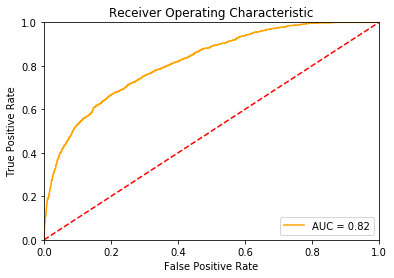

In [235]:
def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])

def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()    
        
print_metrics(y_test, probabilities, 0.3)    
plot_auc(y_test, probabilities)   

In [244]:
ads_test = pd.read_csv('AW_test.csv')#,index_col='CustomerID')
ads_test.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


In [245]:
# Calculate age of customer based on birthdate
def calculate_age(end):
    r = relativedelta(pd.to_datetime('now'), pd.to_datetime(end)) 
    return '{}'.format(r.years)


ads_test['Age'] = ads_test['BirthDate'].apply(calculate_age)

# Convert age to integer
ads_test['Age'] = ads_test['Age'].astype('int64')

In [ ]:
#ads_test['Age']

In [246]:
ads_totest = ads_test[['CountryRegionName','Education','Occupation','Gender',
                      'MaritalStatus','HomeOwnerFlag','NumberCarsOwned',
                      'NumberChildrenAtHome','TotalChildren','YearlyIncome',
                      'Age']]

ads_totest.head()

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,United States,Bachelors,Management,F,S,0,2,0,5,86931,74
1,Canada,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,54
2,United States,Graduate Degree,Management,F,M,1,2,0,4,103985,85
3,United States,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,60
4,France,High School,Manual,F,M,1,1,2,2,21876,53


In [247]:
# Encode categorical data
def encode_string(cat_features):
    
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Education','Occupation',
                       'Gender','MaritalStatus','HomeOwnerFlag']

Features = encode_string(ads_totest['CountryRegionName'])

for col in categorical_columns:
    temp = encode_string(ads_totest[col])
    Features = np.concatenate([Features, temp], axis = 1)
    
print(Features.shape)

(500, 22)


In [248]:
# Add numerical feature
Features = np.concatenate([Features, np.array(ads_totest[['NumberCarsOwned',
                                                        'NumberChildrenAtHome',
                                                        'TotalChildren',
                                                        'YearlyIncome','Age']])], axis = 1)

print(Features.shape)

(500, 27)


In [249]:
X_test = Features
X_test[:,23:] = scaler.transform(X_test[:,23:])

**Check logistic model**

In [250]:
scores = logistic_mod.predict(X_test)
print(scores)

[0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0
 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1
 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1
 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 1 0 0 0 1 0 0 0 1 1 1 

In [251]:
result = pd.DataFrame(scores, index = ads_test['CustomerID'],columns=['BikeBuyer'])

result
result.to_csv('result_log_mod.csv')

In [260]:
'''#NB_mod = GaussianNB()
nr.seed(1115)
nn_mod = MLPClassifier(hidden_layer_sizes = (50,))
#logistic_mod = linear_model.LogisticRegression()
svm_mod = svm.LinearSVC()

nn_mod.fit(X_train, y_train)


#nn_mod = MLPClassifier(hidden_layer_sizes = (50,))
#nn_mod.fit(X_train, y_train)
'''

'#NB_mod = GaussianNB()\nnr.seed(1115)\nnn_mod = MLPClassifier(hidden_layer_sizes = (50,))\n#logistic_mod = linear_model.LogisticRegression()\nsvm_mod = svm.LinearSVC()\n\nnn_mod.fit(X_train, y_train)\n\n\n#nn_mod = MLPClassifier(hidden_layer_sizes = (50,))\n#nn_mod.fit(X_train, y_train)\n'

In [261]:
#X_test[:,23:] = scaler.transform(X_test[:,23:])
#scores = nn_mod.predict(X_test)

In [262]:
'''def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)  
'''

"def print_metrics(labels, scores):\n    metrics = sklm.precision_recall_fscore_support(labels, scores)\n    conf = sklm.confusion_matrix(labels, scores)\n    print('                 Confusion matrix')\n    print('                 Score positive    Score negative')\n    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])\n    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])\n    print('')\n    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))\n    print(' ')\n    print('           Positive      Negative')\n    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])\n    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])\n    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])\n    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])\n\n\n    \nprint_metrics(y_test, scores)  \n"

In [263]:
'''scores = nn_mod.predict(X_test)
print(scores)
'''

'scores = nn_mod.predict(X_test)\nprint(scores)\n'

In [264]:
'''result = pd.DataFrame(scores, index = ads_test['CustomerID'],columns=['BikeBuyer'])

result
result.to_csv('result_nn_mod.csv')
'''

"result = pd.DataFrame(scores, index = ads_test['CustomerID'],columns=['BikeBuyer'])\n\nresult\nresult.to_csv('result_nn_mod.csv')\n"